<a href="https://colab.research.google.com/github/PollicyUG/EAI_July2024/blob/main/Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [ ]:
data = pd.read_csv('/content/heart_failure_clinical_records.csv')
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2        0   244            0  
3        0    90            0  
4        0    50            1

In [ ]:
data.describe()

age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        5000.000000          5000.000000    5000.000000   
mean           37.734600             0.364800  265075.404370   
std            11.514855             0.481422   97999.758622   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  215000.000000   
50%            38.000000             0.000000  263358.030000   
75%            45.000000             1.000000  310000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium          sex      smoking         time  \
count       5000.000000   5000.000000  5000.000000  5000.000000  5000.000000   
mean           1.369106    136.808200     0.645600     0.311800   130.678800   
std            1.009750      4.464236     0.478379     0.463275    77.325928   
min            0.500000    113.000000     0.000000     0.000000     4.000000   
25%            0.900000    134.000000     0.000000     0.000000    74.000000   
50%            1.100000    137.000000     1.000000     0.000000   113.000000   
75%            1.400000    140.000000     1.000000     1.000000   201.000000   
max            9.400000    148.000000     1.000000     1.000000   285.000000   

       DEATH_EVENT  
count  5000.000000  
mean      0.313600  
std       0.464002  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

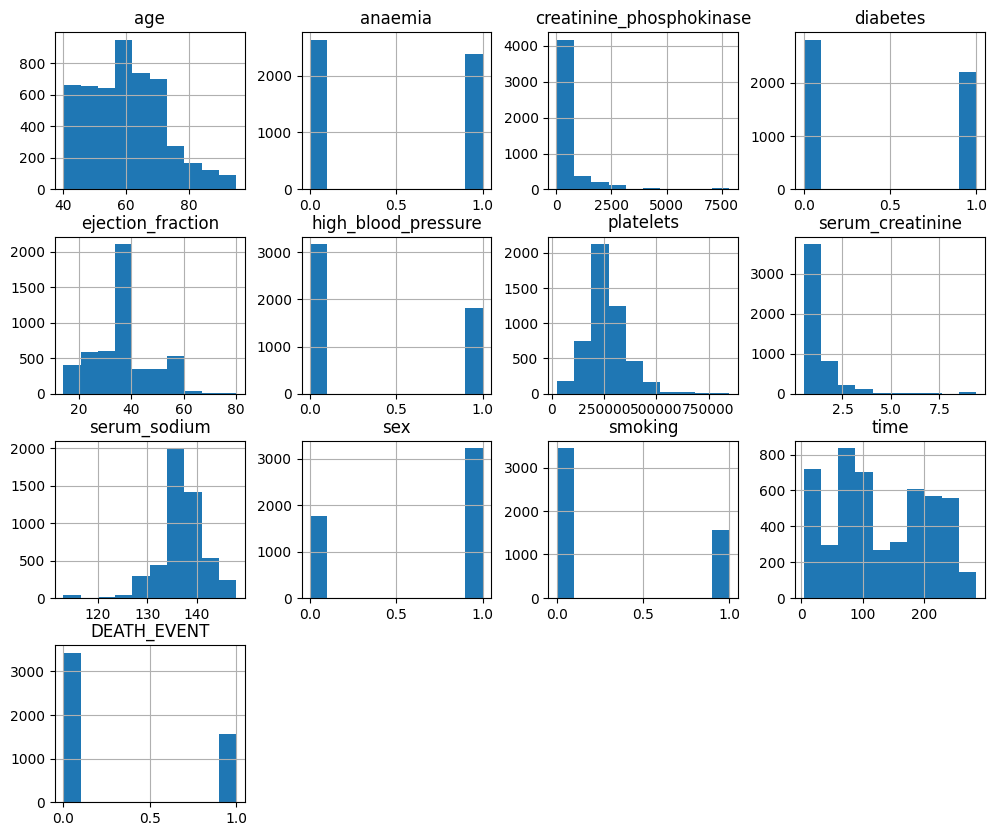

In [ ]:
data.hist(figsize=(12, 10))

In [ ]:
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis = 'columns')

In [ ]:
y.value_counts()

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler().fit(X) # scale the data

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
# Split the data into training and testing sets
# stratify=y ensures that the class distribution is preserved in both sets
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, stratify=y)

# Check the distribution of classes in both training and testing sets
np.unique(train_y, return_counts=True), np.unique(test_y, return_counts=True)

((array([0, 1]), array([2574, 1176])), (array([0, 1]), array([858, 392])))

In [ ]:
# Import the RandomOverSampler from imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

# Apply random oversampling to the training data
# random_state=42 ensures reproducibility
train_X_sampled, train_y_sampled = RandomOverSampler(random_state=42).fit_resample(train_X, train_y)

# Check the distribution of classes in the resampled target variable
# np.unique returns unique values and their counts
np.unique(train_y_sampled, return_counts=True)

(array([0, 1]), array([2574, 2574]))

# Interpretable ML

In [ ]:
!pip install interpret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00


In [ ]:
from interpret.glassbox import LogisticRegression, ClassificationTree, ExplainableBoostingClassifier
from interpret import show
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Logisitic Regression


<p align = 'center'>
 <img src="https://www.saedsayad.com/images/LogReg_1.png">
</p>

### Multiple Linear Regression Formula

The general form of the multiple linear regression equation is:

$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \cdots + \beta_n X_n + \epsilon
$

where:

- $ Y $ is the dependent variable (the outcome you are trying to predict).
- $ \beta_0 $ is the intercept (the value of $ Y $ when all independent variables are zero).
- $ \beta_1, \beta_2, \beta_3, \ldots, \beta_n $ are the coefficients (the change in $ Y $ for a one-unit change in the respective independent variable).
- $ X_1, X_2, X_3, \ldots, X_n $ are the independent variables (the predictors).
- $ \epsilon $ is the error term (the difference between the actual and predicted values of $ Y $).

The goal of multiple linear regression is to estimate the coefficients $ \boldsymbol{\beta} $ that minimize the sum of the squared differences between the observed values and the values predicted by the model.



In [ ]:
# Initialize a Logistic Regression model
# random_state=42 ensures reproducibility
# feature_names=X.columns assigns names to the features for interpretability
lr = LogisticRegression(random_state=42, feature_names=X.columns)

# Fit the model on the oversampled training data
lr.fit(train_X_sampled, train_y_sampled)

In [ ]:
print(classification_report(lr.predict(train_X_sampled), train_y_sampled))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2653
           1       0.79      0.82      0.80      2495

    accuracy                           0.81      5148
   macro avg       0.81      0.81      0.81      5148
weighted avg       0.81      0.81      0.81      5148



In [ ]:
print(classification_report(lr.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       792
           1       0.81      0.69      0.75       458

    accuracy                           0.83      1250
   macro avg       0.82      0.80      0.81      1250
weighted avg       0.83      0.83      0.82      1250



In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
local_explanation = lr.explain_local(test_X[:100], test_y[:100])
show(local_explanation)

In [ ]:
global_explanation = lr.explain_global()

In [ ]:
show(global_explanation)

## Decision Tree




<p align = 'center'>
 <img src="https://www.ge.com/digital/documentation/csense/version2023/Decision%20Tree%20Application/assets/images/DecisionTreeexample.gif">
</p>



In [ ]:
data['sex'].value_counts()

sex
1    3228
0    1772
Name: count, dtype: int64

In [ ]:
tree = ClassificationTree(feature_names= X.columns).fit(train_X_sampled, train_y_sampled)

In [ ]:
print(classification_report(tree.predict(train_X_sampled), train_y_sampled))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2787
           1       0.83      0.90      0.86      2361

    accuracy                           0.87      5148
   macro avg       0.87      0.87      0.87      5148
weighted avg       0.87      0.87      0.87      5148



In [ ]:
print(classification_report(tree.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       872
           1       0.81      0.84      0.82       378

    accuracy                           0.89      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.89      0.89      0.89      1250



In [ ]:
local_explanations = tree.explain_local(test_X[:100], test_y[:100])
show(local_explanations)

In [ ]:
global_explanations = tree.explain_global()
show(global_explanations)

## Explainable Boosted Machines



<p align = 'center'>
 <img src="https://miro.medium.com/v2/resize:fit:1400/0*1K6IfG3HCnZ3irAw">
</p>

"https://www.youtube.com/watch?v=MREiHgHgl0k&t=0s"



In [ ]:
ebm = ExplainableBoostingClassifier(random_state = 42).fit(train_X_sampled, train_y_sampled)

In [ ]:
print(classification_report(ebm.predict(train_X_sampled), train_y_sampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00      2572

    accuracy                           1.00      5148
   macro avg       1.00      1.00      1.00      5148
weighted avg       1.00      1.00      1.00      5148



In [ ]:
print(classification_report(ebm.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       859
           1       0.98      0.99      0.99       391

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [ ]:
local_explanations = ebm.explain_local(test_X[:100], test_y[:100])
show(local_explanations)

In [ ]:
global_explanations = ebm.explain_global()
show(global_explanations)

# LIME

In [ ]:
!pip install lime -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## Introduction to LIME

In [ ]:
from interpret.blackbox import LimeTabular # For Tabular Data
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(train_X_sampled, train_y_sampled)

RandomForestClassifier()

In [ ]:
print(classification_report(forest.predict(train_X_sampled), train_y_sampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00      2572

    accuracy                           1.00      5148
   macro avg       1.00      1.00      1.00      5148
weighted avg       1.00      1.00      1.00      5148



In [ ]:
print(classification_report(forest.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       863
           1       0.98      0.99      0.99       387

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [ ]:
lime_explainer = LimeTabular(forest, data = train_X_sampled, feature_names=data.columns[:-1])

In [ ]:
lime_local = lime_explainer.explain_local(test_X[:100], test_y[:100], name = 'LIME')

In [ ]:
show(lime_local)

## LIME ON IMAGE DATA

In [ ]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
inet_model = inc_net.InceptionV3()

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        # Load the image and resize it to 299x299 pixels (InceptionV3 input size)
        img = image.load_img(img_path, target_size=(299, 299))

        # Convert the image to a numpy array
        x = image.img_to_array(img)

        # Add a dimension to represent the batch size (1)
        x = np.expand_dims(x, axis=0)

        # Preprocess the image for InceptionV3
        x = inc_net.preprocess_input(x)

        # Add the processed image to our list
        out.append(x)

    # Stack all processed images vertically into a single numpy array
    return np.vstack(out)

35363/35363 [==============================] - 0s 0us/step
('n04371774', 'swing', 0.9809806)
('n02999410', 'chain', 0.0008630188)
('n02356798', 'fox_squirrel', 0.00055446726)
('n03532672', 'hook', 0.00018769832)
('n03126707', 'crane', 0.00018439082)


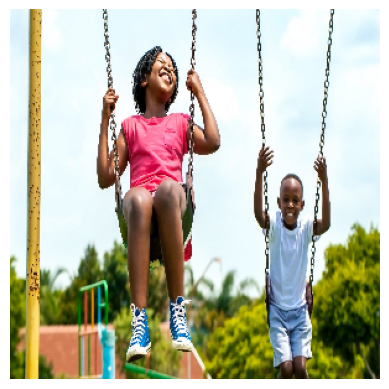

In [ ]:
# Process the image
images = transform_img_fn(['/content/Outdoor-Play-for-Children.jpg'])

# Set up the plot
plt.axis(False)  # Turn off axis

# Display the image
# Rescale pixel values from [-1, 1] to [0, 1] for display
plt.imshow(images[0] / 2 + 0.5)

# Make predictions using the InceptionV3 model
preds = inet_model.predict(images)

# Decode and print the top predictions
for x in decode_predictions(preds)[0]:
    print(x)

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer() #initiate the Lime Image explainer


In [ ]:
def get_explanation_and_plots(img):
    explanation = explainer.explain_instance(img.astype('double'), inet_model.predict,
                                            top_labels=5, hide_color=0, num_samples=1000)

    # First image
    temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    image1 = mark_boundaries(temp1 / 2 + 0.5, mask1)

    # Second image
    temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    image2 = mark_boundaries(temp2 / 2 + 0.5, mask2)

    # Plot side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Display the first image
    ax[0].imshow(image1)
    ax[0].set_title('Positive Only, Hide Rest')

    # Display the second image
    ax[1].imshow(image2)
    ax[1].set_title('Positive Only, Show Rest')

    # Hide axes
    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


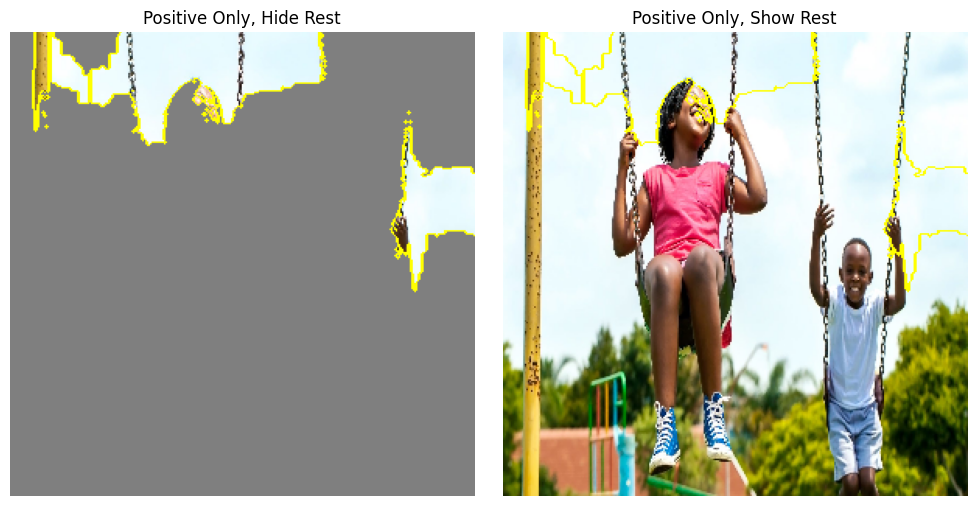

CPU times: user 26 s, sys: 972 ms, total: 27 s
Wall time: 39.8 s


In [ ]:
%%time
get_explanation_and_plots(images[0])

1/1 [==============================] - 0s 39ms/step
('n02423022', 'gazelle', 0.07770041)
('n02437616', 'llama', 0.04017998)
('n02391049', 'zebra', 0.036176614)
('n02389026', 'sorrel', 0.028381106)
('n04604644', 'worm_fence', 0.019318232)


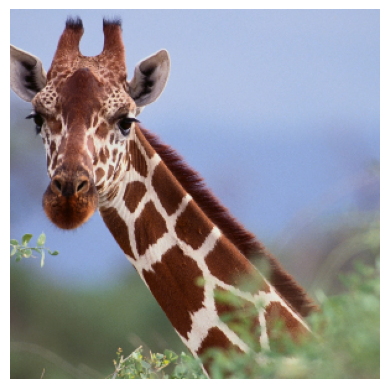

In [ ]:
images = transform_img_fn(['/content/giraffe.jpg'])
plt.axis(False)
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


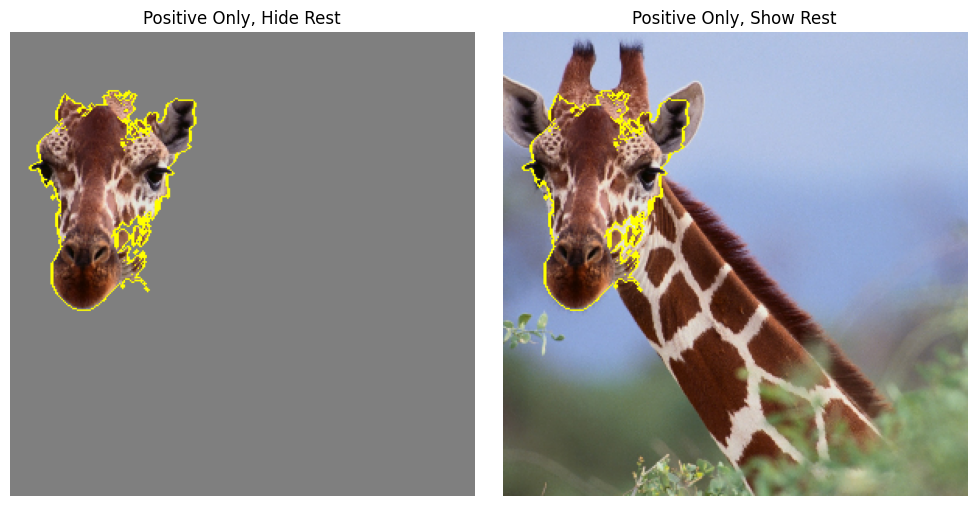

CPU times: user 21.7 s, sys: 903 ms, total: 22.6 s
Wall time: 24.6 s


In [ ]:
%%time
get_explanation_and_plots(images[0])

# SHAP

In [ ]:
!pip install shap -qq

## SHAP on Image Data

In [ ]:
import shap
import json
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

In [ ]:
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [ ]:
class_names

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel',
 'kite',
 'bald_eagle',
 'vulture',
 'great_grey_owl',
 'European_fire_salamander',
 'common_newt',
 'eft',
 'spotted_salamander',
 'axolotl',
 'bullfrog',
 'tree_frog',
 'tailed_frog',
 'loggerhead',
 'leatherback_turtle',
 'mud_turtle',
 'terrapin',
 'box_turtle',
 'banded_gecko',
 'common_iguana',
 'American_chameleon',
 'whiptail',
 'agama',
 'frilled_lizard',
 'alligator_lizard',
 'Gila_monster',
 'green_lizard',
 'African_chameleon',
 'Komodo_dragon',
 'African_crocodile',
 'American_alligator',
 'triceratops',
 'thunder_snake',
 'ringneck_snake',
 'hognose_snake',
 'green_snake',
 'king_snake',
 'garter_snake',
 'water_snake',
 'vine_snake',
 'night_snake',
 'boa_constrictor',
 'rock_python',
 'Indian_cobr

In [ ]:
def pred_func(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(pred_func, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    X[1: 5], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

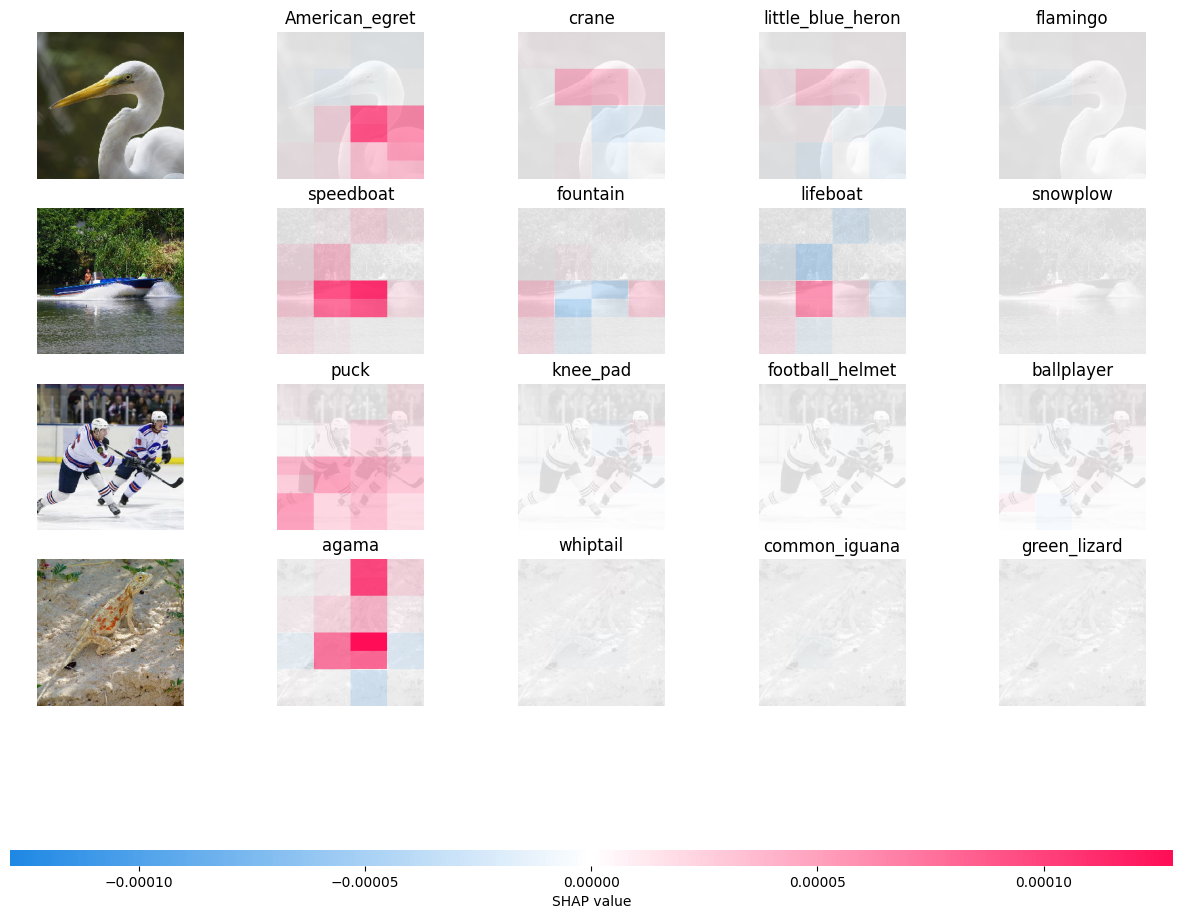

In [ ]:
# output with shap values
shap.image_plot(shap_values, X[1:5]/255)